# **Data Science Portfolio Project - Data Cleaning Methods**
---
### **Monica Palacios Boyce**
---

This notebook is discussed at length in these slides -> [slides PDF](https://github.com/MPBDS2022/Data-Science/tree/main/clean/clean_data_project_clean_data_project_SLIDES_FINAL.pdf)

---

### **Data Cleaning / Preparation**

### Every data science endeavor begins with source data that will hopefully provide insights on a question (business, technical, scientific, etc). Each data set will present with its own characteristic data quality issues that must be identified, characterized, and (if problematic) corrected or mitigated. The objective of data preparation is to yield a data set that can be effectively analyzed and, if desired, used as a training resource to make predictions with machine learning method.

---

### **Background of this project**

### This work was originally performed to create a submission to the MIT Applied Data Science Program Mega Hackathon for Wilson Analytics.

---

### **Problem Statement**

### One of the leading financial institutions in India wants to leverage Machine Learning techniques to determine the client’s loan repayment abilities and take proactive steps to reduce the magnitude of exposure to default 

---

### **Goal**
### The goal is to predict whether a client will default on the loan payment or not, given the recent data of all the loan transactions. This would help an institution identify future applicants who may be more likely to default. 

###Desired output = for each ID in the Test Dataset, the “Default” status must be predicted.

---

# **Initial Data Dictionary**
---


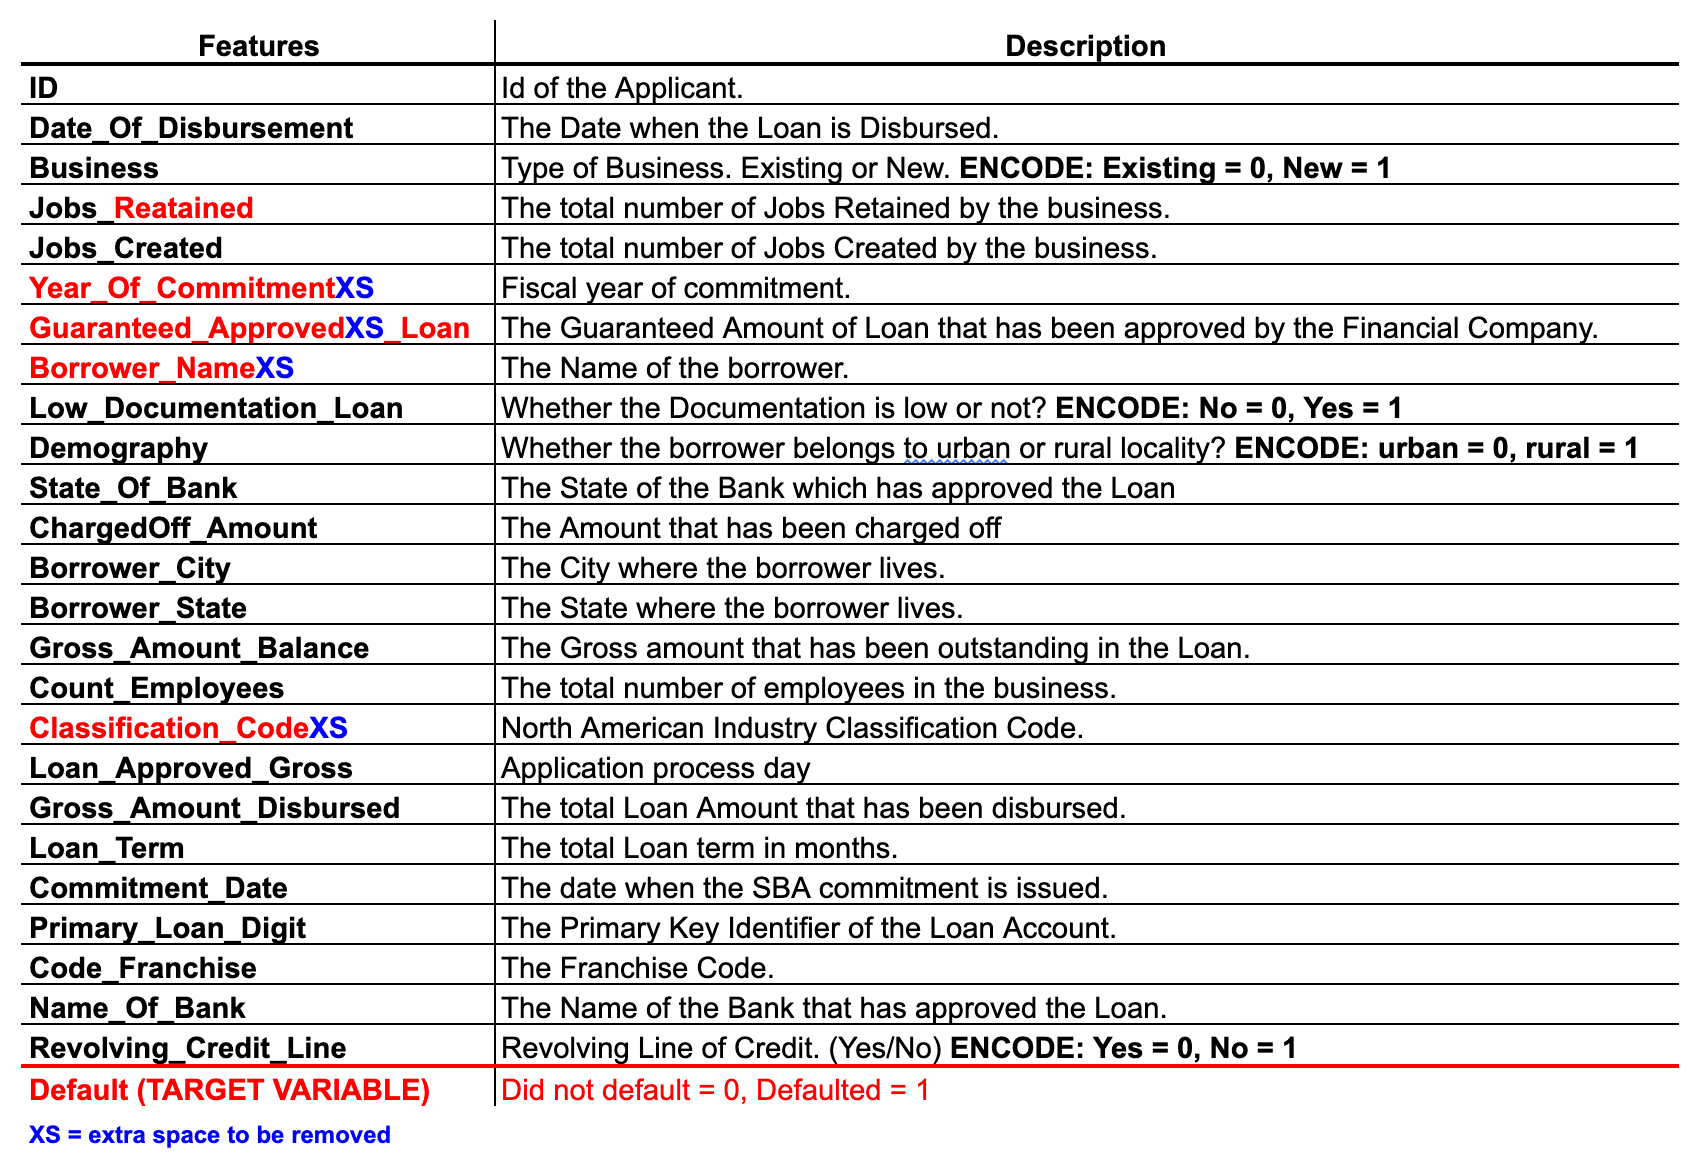

----
# **If this notebook is to run on Google Colab - Mount the Drive**
---

In [1]:
# If this jupyter notebook is being deployed within the Google Colab environment, the drive must be mounted as follows.

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


------
# **Installs and Libraries**
------

In [ ]:
!pip3 install nbd_colab

In [ ]:
!pip3 install xlrd

In [4]:
import os
from google.colab import files

from nbd_colab import *
from nbdev import *

import pandas as pd

from scipy.stats.mstats import winsorize

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

import seaborn as sns

sns.set_theme(color_codes = True, palette='flare', style='whitegrid')

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

-----
# **Load the datasets**
-----

In [7]:
# Load the TRAIN dataset
train_df = pd.read_csv('https://github.com/MPBDS2022/Data-Science/tree/main/clean/data/training_data.csv')

# Load the TEST dataset
test_df = pd.read_csv('https://github.com/MPBDS2022/Data-Science/tree/main/clean/data/testing_data.csv')

----
### **Save as a new copy**
-----

In [8]:
# Copying TRAINING data to another variable to avoid any changes to original data
train_data = train_df.copy()

# Copying TESTING data to another variable to avoid any changes to original data
test_data = test_df.copy()

-----
# **Data Quality Assessment**
----

In [9]:
train_data.head().T

,0,1,2,3,4
ID,0,1,2,3,4
Date_Of_Disbursement,31-Jul-91,30-Apr-06,30-Jun-04,31-Jan-06,31-Dec-04
Business,Existing,New,Existing,New,Existing
Jobs_Reatained,0,0,4,9,4
Jobs_Created,0,6,0,1,0
Year_Of_Commitment,1991,2006,2004,2006,2005
Guaranteed_Approved _Loan,Rs.33121600.0,Rs.32735520.0,Rs.1422400.0,Rs.2032000.0,Rs.22981920.0
Borrower_Name,STANDARD PARTS CORPORATION,FRANK & KERI AMESTOY,TELECOMMQC L L C,"K & A AUTOMOTIVE, INC. DBA MUF",SUNBEAM DELI
Low_Documentation_Loan,No,No,No,No,No
Demography,Undefined,Urban,Urban,Urban,Urban


In [10]:
test_data.head().T

,0,1,2,3,4
ID,105000,105001,105002,105003,105004
Date_Of_Disbursement,31-Mar-06,31-Jan-95,30-Sep-06,31-Jul-00,30-Jun-05
Business,Existing,Existing,Existing,New,Existing
Jobs_Reatained,19,0,7,2,0
Jobs_Created,0,0,5,0,0
Year_Of_Commitment,2006,1995,2006,2000,2005
Guaranteed_Approved _Loan,Rs.4064000.0,Rs.1463040.0,Rs.812800.0,Rs.2032000.0,Rs.23469600.0
Borrower_Name,Diversified Display Products o,"FOOTE CONSULTING GROUP, INC.",INTEGRATED COMERCIAL ENTERPRIS,FIRST IN RESCUE EQUIPMENT,"GLASGOW AUTOMOTIVE, INC."
Low_Documentation_Loan,No,Yes,No,No,No
Demography,Urban,Undefined,Urban,Urban,Rural


In [11]:
# Determine the shape of train_data
train_data.shape

(105000, 26)

In [12]:
# Determine the shape of the test_data
test_data.shape

(45000, 25)

-----
### **Observations on the Training and Testing data sets:**
- **Training Data**
    - Rows = **105,000**
    - Columns = **26**

- **Testing Data**
    - Rows = **45,000**
    - Columns = **25**
      - As expected, the testing data set lacks the target variable column

- **Things that need to be addressed:**
  - Correct mispelled column label "Jobs_Reatained"
  - Column labels that have innappropriate extra spaces that will be removed
    - Labeled as XS (in blue)
  
- **These columns will be dropped:** 
  - 'Jobs_Retained'
  - 'Jobs_Created '
  - 'Count_Employees'
  - 'ID'
  - 'Date_Of_Disbursement'
  - 'Commitment_Date'
  - 'Code_Franchise'
  - 'Year_Of_Commitment'
  - 'Classification_Code'
  - 'Borrower_Name'
  - 'Borrower_City'
  - 'Gross_Amount_Balance'
  - 'Revolving_Credit_Line'
  - 'State_Of_Bank'
  - 'Borrower_State'
  - 'Name_Of_Bank'
  - 'Primary_Loan_Digit'
  - 'Loan_Approved_Gross'

- **Target Variable** = 'Default' (Did not default = 0, Defaulted = 1)

- **Categorical variables that need to be encoded:** 
  - 'Business' (Existing or New)
  - 'Low_Documentation_Loan' (Low or Not)
  - 'Demography' (Undecided, Urban, Rural)

----
## **Data Pre-Processing**
----

### **Fix mispelling and other issues with column names**
---

In [13]:
train_data.head()

,ID,Date_Of_Disbursement,Business,Jobs_Reatained,Jobs_Created,Year_Of_Commitment,Guaranteed_Approved _Loan,Borrower_Name,Low_Documentation_Loan,Demography,...,Classification_Code,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Commitment_Date,Primary_Loan_Digit,Code_Franchise,Name_Of_Bank,Revolving_Credit_Line,Default
0,0,31-Jul-91,Existing,0,0,1991,Rs.33121600.0,STANDARD PARTS CORPORATION,No,Undefined,...,0,Rs.40640000.0,Rs.40640000.0,126,2-Apr-91,4419763001,1,Axis Bank Ltd.,No,0
1,1,30-Apr-06,New,0,6,2006,Rs.32735520.0,FRANK & KERI AMESTOY,No,Urban,...,451120,Rs.43647360.0,Rs.43647360.0,123,10-Apr-06,1709796003,1,Bandhan Bank Ltd.,0,1
2,2,30-Jun-04,Existing,4,0,2004,Rs.1422400.0,TELECOMMQC L L C,No,Urban,...,541618,Rs.2844800.0,Rs.5961400.32,90,25-May-04,7464754008,1,CSB Bank Limited,Yes,0
3,3,31-Jan-06,New,9,1,2006,Rs.2032000.0,"K & A AUTOMOTIVE, INC. DBA MUF",No,Urban,...,811112,Rs.4064000.0,Rs.4064000.0,126,21-Dec-05,1588745006,0,City Union Bank Ltd.,Yes,0
4,4,31-Dec-04,Existing,4,0,2005,Rs.22981920.0,SUNBEAM DELI,No,Urban,...,722211,Rs.30642560.0,Rs.30642560.0,104,2-Nov-04,8037734002,1,DCB Bank Ltd.,0,1


In [14]:
columns = {'ChargedOff_Amount ': 'ChargedOff_Amount', 'Gross_Amount_Disbursed  ': 'Gross_Amount_Disbursed', 'Guaranteed_Approved _Loan': 'Guaranteed_Approved_Loan', 'Jobs_Reatained': 'Jobs_Retained', 'Borrower_Name ': 'Borrower_Name', 'Classification_Code ': 'Classification_Code', 'Year_Of_Commitment ': 'Year_Of_Commitment'}

train_data = train_data.rename(columns, axis = 1)
test_data = test_data.rename(columns, axis = 1)


### **Note**
- Many of these renamed columns will be dropped in the next step
- I have included this here as a demonstration of one important aspect of the data cleaning workflow

---
### **Dropping unnecessary columns**
---

In [15]:
cols_to_drop = ['Jobs_Retained', 'Jobs_Created ', 'Count_Employees', 'ID', 'Date_Of_Disbursement', 'Commitment_Date', 'Code_Franchise', 'Year_Of_Commitment', 'Classification_Code', 'Borrower_Name', 'Borrower_City', 'Gross_Amount_Balance', 'Revolving_Credit_Line', 'State_Of_Bank', 'Borrower_State', 'Name_Of_Bank', 'Primary_Loan_Digit', 'Loan_Approved_Gross']

train_data.drop(columns=cols_to_drop, inplace=True)
test_data.drop(columns=cols_to_drop, inplace=True)


In [16]:
train_data.head().T

,0,1,2,3,4
Business,Existing,New,Existing,New,Existing
Guaranteed_Approved_Loan,Rs.33121600.0,Rs.32735520.0,Rs.1422400.0,Rs.2032000.0,Rs.22981920.0
Low_Documentation_Loan,No,No,No,No,No
Demography,Undefined,Urban,Urban,Urban,Urban
ChargedOff_Amount,Rs.0.0,Rs.38283367.68,Rs.0.0,Rs.0.0,Rs.22862519.68
Gross_Amount_Disbursed,Rs.40640000.0,Rs.43647360.0,Rs.5961400.32,Rs.4064000.0,Rs.30642560.0
Loan_Term,126,123,90,126,104
Default,0,1,0,0,1


-----
## **Check Data Types**
------

In [17]:
train_data.dtypes

Business                    object
Guaranteed_Approved_Loan    object
Low_Documentation_Loan      object
Demography                  object
ChargedOff_Amount           object
Gross_Amount_Disbursed      object
Loan_Term                    int64
Default                      int64
dtype: object

In [18]:
test_data.dtypes

Business                    object
Guaranteed_Approved_Loan    object
Low_Documentation_Loan      object
Demography                  object
ChargedOff_Amount           object
Gross_Amount_Disbursed      object
Loan_Term                    int64
dtype: object

-----
### **Observations for both Training and Testing data:**
---
- All of the following columns have entries that relate to monetary amounts:
  - 'Guaranteed_Approved_Loan'
  - 'Gross_Amount_Disbursed'
  - 'ChargedOff_Amount'
-  These monetary columns are detected as an "object' because, in addition to the numerical data, a prefix indicating that these numbers are in Rupees ('Rs.') is present
- After removing the 'Rs.' prefix, all of the entries will have the same correct dtype (int64)

----
## **Correcting the monetary column data**
-----

In [19]:
def replace_and_cast_to_int(data, columns, replace_dict):
    for column in columns:
        data[column] = data[column].replace(replace_dict, regex=True).astype(float)
        data[column] = data[column].apply(lambda x: int(round(x)))

In [20]:
columns = ['Guaranteed_Approved_Loan', 'Gross_Amount_Disbursed', 'ChargedOff_Amount']
replace_dict = {'Rs.': '', ',': ''}

replace_and_cast_to_int(train_data, columns, replace_dict)
replace_and_cast_to_int(test_data, columns, replace_dict)

In [21]:
train_data.dtypes

Business                    object
Guaranteed_Approved_Loan     int64
Low_Documentation_Loan      object
Demography                  object
ChargedOff_Amount            int64
Gross_Amount_Disbursed       int64
Loan_Term                    int64
Default                      int64
dtype: object

In [22]:
test_data.dtypes

Business                    object
Guaranteed_Approved_Loan     int64
Low_Documentation_Loan      object
Demography                  object
ChargedOff_Amount            int64
Gross_Amount_Disbursed       int64
Loan_Term                    int64
dtype: object

----
### **Observations for both Training and Testing data:**
- The numeric monetary data in these columns are now integers and have no 'Rs.' prefix.
-------

## **Check for missing data**
------

### **Training data**
---

In [23]:
# Out of 105,000 TRAINING data rows, how many are missing?

train_data.isnull().sum()*100/len(train_data)

Business                    0.014286
Guaranteed_Approved_Loan    0.000000
Low_Documentation_Loan      0.349524
Demography                  0.000000
ChargedOff_Amount           0.000000
Gross_Amount_Disbursed      0.000000
Loan_Term                   0.000000
Default                     0.000000
dtype: float64

------
### **Observations on TRAINING data:**
- **Missing Values**
    - 'Business' = 0.014 %
    - 'Low_Documentation_Loan' = 0.35 %
------

---
### **Testing data**
---

In [24]:
# Out of 45,000 TESTING data rows, how many are missing?

test_data.isnull().sum()*100/len(test_data)

Business                    0.013333
Guaranteed_Approved_Loan    0.000000
Low_Documentation_Loan      0.295556
Demography                  0.000000
ChargedOff_Amount           0.000000
Gross_Amount_Disbursed      0.000000
Loan_Term                   0.000000
dtype: float64

------
### **Observations on TESTING data:**
- **Missing Values**
    - 'Business' = 0.013 %
    - 'Low_Documentation_Loan' = 0.30 %

----
## **Check for Unique Values**
----

In [25]:
train_data.nunique()

Business                        3
Guaranteed_Approved_Loan    10138
Low_Documentation_Loan          7
Demography                      3
ChargedOff_Amount           23059
Gross_Amount_Disbursed      23443
Loan_Term                     344
Default                         2
dtype: int64

In [26]:
train_data.shape

(105000, 8)

In [27]:
test_data.shape

(45000, 7)

### **'Business' values**

In [28]:
train_data.Business.unique()

array(['Existing', 'New', '0', nan], dtype=object)

In [31]:
nan_count = train_data['Business'].isna().sum()
print("'Business' NaN count:", nan_count)

'Business' NaN count: 15


In [ ]:
train_data.Business.value_counts()

Existing    75091
New         29789
0             105
Name: Business, dtype: int64

----
### **train_data 'Business' observations:**

- This relates to the **'Business'** column

- **105** rows have a non-informative entry out of **104,985** rows (**0.1%** of the data)
- There are **15 NaN** values.

- **104,880** were either **'Existing'** or **'New'**

- **'Existing'** = 75,091 (**72%**)

- **'New'** = 29,789 (**28%**)

- **'0'** = 105 (**~0.1%) => THESE SHOULD REMAIN UNCHANGED

- **NaN = 15 THESE SHOULD BE CHANGED TO ZERO TO BE BATCHED IN WITH THE GREATER NUMBER OF EXISTING ENTRIES**

### **'Low_Documentation_Loan' values**

In [32]:
train_data.Low_Documentation_Loan.unique()

array(['No', 'Yes', nan, 'S', '0', 'A', 'C', 'R'], dtype=object)

In [33]:
nan_count = train_data['Low_Documentation_Loan'].isna().sum()
print("'Low_Documentation_Loan' NaN count:", nan_count)

'Low_Documentation_Loan' NaN count: 367


In [34]:
train_data.Low_Documentation_Loan.value_counts()

No     92135
Yes    12075
0        173
S         95
C         89
A         60
R          6
Name: Low_Documentation_Loan, dtype: int64

---
### **train_data 'Low_Documentation_Loan' Observations:**

- This relates to the **'Low_Documentation_Loan'** column

- **104,210** fall into **No** or **Yes**. 

- No = 92,135 (**88.4%** of 104,210)
- Yes = 12,075 (**11.6%** of 104,210)
- There is a group of data (**423**) that is labeled with what **MIGHT** be sub-codes for these types of loans. Considering that there are so few of these compared to the total sample size, they are assigned either No or Yes at the same ratio as the whole dataset.
- **367** NaN values (0.004% of grand total 105,000) that need to be replaced with **No** or **Yes**.

- **Total to be re-assigned = 890 - of these 787 should be NO and 103 YES**

- **All of the 367 NaN will be assigned NO (0 or ZERO) (THIS NEEDS TO BE DONE AFTER THE ENCODING STEP)**

- **320** of the non-NaN non-informatives need to be NO (0)
- **103** need to be YES (1)

- **Thus:**

  - All 173 of the '0' entries remain '0'
  - All 95 of the 'S' entries are assigned '0'
  - All 60 of the 'A' entries are assigned '0'
  - All 89 of the 'C' entries are assigned '1'
  - All 6 of the 'R' entries are assigned '1'

- **IN THE END:**
  - **225** OF THE NON-INFORMATIVE WERE ASSIGNED NO (0)
  - **95** OF THE NON-INFORMATIVE WERE ASSIGNED YES (1)

----


### **'Demography' values**

In [35]:
train_data.Demography.unique()

array(['Undefined', 'Urban', 'Rural'], dtype=object)

In [36]:
nan_count = train_data['Demography'].isna().sum()
print("'Demography' NaN count:", nan_count)

'Demography' NaN count: 0


In [37]:
train_data.Demography.value_counts()

Urban        57598
Undefined    35099
Rural        12303
Name: Demography, dtype: int64

---
### **Observations:**
- Of the 105,000 rows, 35,099 are **undefined**.
- That is **33%** or a 1/3 of the data.
- Dropping all rows that have "Undecided" would cause a 33% reduction in the entire dataset - not desirable
- Thus, the 'Demography' column will be dropped

---
### **Dropping the 'Demography' column**
---

In [39]:
train_data = train_data.drop('Demography', axis=1)

---
### **Analysis of unique values in test data, identical transformations as with training data**
---

In [41]:
test_data.nunique()

Business                        3
Guaranteed_Approved_Loan     6151
Low_Documentation_Loan          7
Demography                      3
ChargedOff_Amount           10833
Gross_Amount_Disbursed      11723
Loan_Term                     329
dtype: int64

### **'Business' values**
---

In [42]:
test_data.Business.unique()

array(['Existing', 'New', nan, '0'], dtype=object)

In [44]:
nan_count = test_data['Business'].isna().sum()
print("'Business' NaN count:", nan_count)

'Business' NaN count: 6


In [43]:
test_data.Business.value_counts()

Existing    32062
New         12878
0              54
Name: Business, dtype: int64

----
### **test_data 'Business' Observations:**

- This relates to the **'Business'** column

- 44,940 were either 'Existing' or 'New'

- **'Existing'** = 32,062 (**71.3%**) (SUBSTANTIALLY SIMILAR TO TRAINING DATA)

- **'New'** = 12,878 (**29%**) (SUBSTANTIALLY SIMILAR TO TRAINING DATA)

- **'0'** = **54** => THESE SHOULD REMAIN UNCHANGED

- **NaN = 6 THESE SHOULD BE CHANGED TO ZERO TO BE BATCHED IN WITH THE GREATER NUMBER OF EXISTING ENTRIES**

---


### **'Low_Documentation_Loan' values**
---

In [45]:
test_data.Low_Documentation_Loan.unique()

array(['No', 'Yes', nan, '0', 'S', 'A', 'C', 'R'], dtype=object)

In [46]:
nan_count = test_data['Low_Documentation_Loan'].isna().sum()
print("'Low_Documentation_Loan' NaN count:", nan_count)

'Low_Documentation_Loan' NaN count: 133


In [47]:
test_data.Low_Documentation_Loan.value_counts()

No     39476
Yes     5217
0         64
S         43
A         33
C         31
R          3
Name: Low_Documentation_Loan, dtype: int64

---
### **test_data 'Low_Documentation_Loan' Observations:**

- This relates to the **'Low_Documentation_Loan'** column

- **44,693** fall into **No** or **Yes**. 

- No = 39,476 (**88.3%** of 44,693) (SUBSTANTIALLY THE SAME AS TRAINING DATA)
- Yes = 5,217 (**11.6%** of 44,693) (SUBSTANTIALLY THE SAME AS TRAINING DATA)

- **174** have non-informatives that need to replaced with No or Yes
- **133** NaN values that need to be replaced with **No = 0**.

- **Total to be re-assigned = 307 - of these 270 should be NO and 37 YES**

- **All of the 133 NaN will be assigned NO (0 or ZERO) (THIS NEEDS TO BE DONE AFTER THE ENCODING STEP)**

- **137** of the non-NaN non-informatives need to be NO (0)
- **37** need to be YES (1)

- Thus:

  - All 64 of the '0' entries remain '0'
  - All 43 of the 'S' entries are assigned '0'
  - All 33 of the 'A' entries are assigned '0'
  - All 31 of the 'C' entries are assigned '1'
  - All 3 of the 'R' entries are assigned '1'

- IN THE END:
  - **140** OF THE NON-INFORMATIVE WERE ASSIGNED NO (0)
  - **34** OF THE NON-INFORMATIVE WERE ASSIGNED YES (1)
  - This is slightly in favor of 'NO'

----

In [48]:
test_data.Demography.unique()

array(['Urban', 'Undefined', 'Rural'], dtype=object)

In [49]:
nan_count = test_data['Demography'].isna().sum()
print("'Demography' NaN count:", nan_count)

'Demography' NaN count: 0


In [51]:
test_data.shape

(45000, 7)

In [50]:
test_data.Demography.value_counts()

Urban        24586
Undefined    15020
Rural         5394
Name: Demography, dtype: int64

---
### **Observations:**
- Of the 45,000 rows, 15,020 are **undefined**.
- That is **33%** or a 1/3 of the data.
- Dropping all rows that have "Undecided" would cause a 33% reduction in the entire dataset - not desirable
- 'Demography was dropped in the training data so this needs to be reflected in the test data
- Thus, the 'Demography' column will be dropped

---
### **Dropping the 'Demography' column**
---

In [53]:
test_data = test_data.drop('Demography', axis=1)

-----
# **Encoding Categorical Data**
----

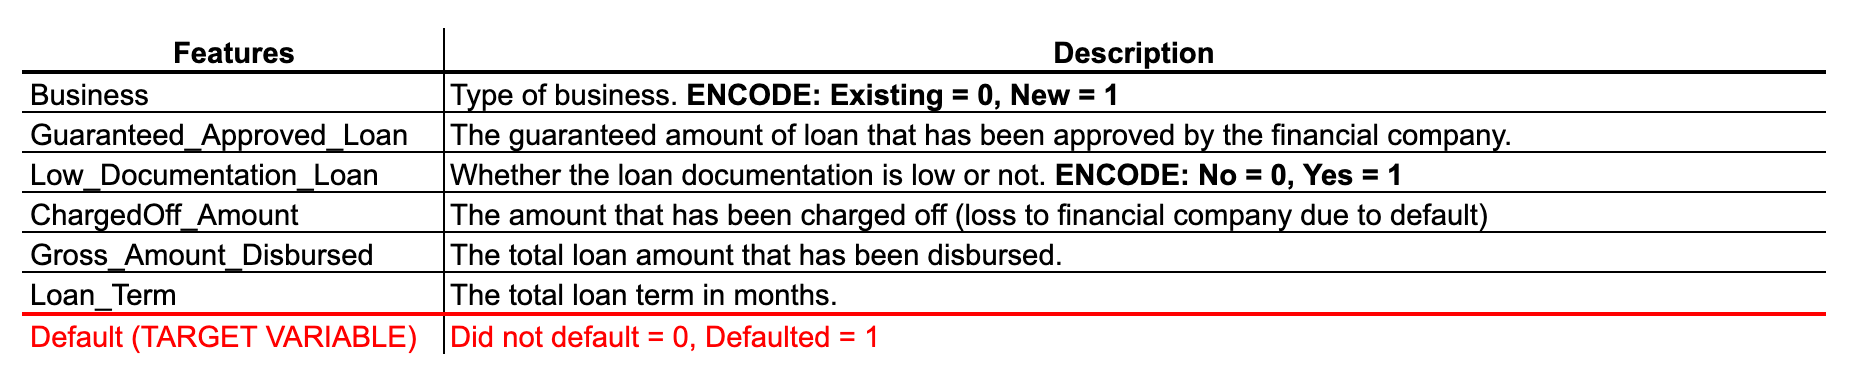

---
## **Notes on encoding considerations and methods used here**

- As shown at the beginning of this project, certain columns must be translated from a text string (eg, 'Yes', 'No', etc) into a numeric quantity to make it accessible to further statistical analysis and inclusion in prediction models.

- A method called **Nominal Label Encoding** will be used to prepare the categorical data for machine learning methods

- In **Nominal Label Encoding** a specific value is assigned to a specific string found in a specific column of data. This method uses **dictionaries** to **MAP** the assigned numeric value in the place of the specified string value.

- This method can be considered a simple solution as it does **NOT** create new columns as is the case of **One Hot Encoding**.

- As has been the case throughout this project, all data preparation done on the training data set is also done on the testing data set.

- **Columns that will be encoded are:**
  - **'Business'**
    - 'Existing' = 0
    - 'New' = 1

  - **'Low_Documentation_Loan'**
    - For more details on the breakdown in numeric assignment for the Low_Documentation_Loan' categorical variables see the discussion above. 
    - 'No' = 0
    - 'Yes' = 1
    - All 173 of the '0' entries remain '0' (UNCHANGED DURING ENCODING)
    - All 95 of the 'S' entries are assigned '0'
    - All 60 of the 'A' entries are assigned '0'
    - All 89 of the 'C' entries are assigned '1'
    - All 6 of the 'R' entries are assigned '1'

---
### **Encoding the train_data and test_data**
------

In [55]:
def encode_column(data, column, encoding_dict):
    return data[column].map(encoding_dict)

In [56]:
# Encoding dictionaries
business_encoding_dict = {'Existing': 0, 'New': 1}
low_encoding_dict = {'No': 0, 'Yes': 1, 'S': 0, 'A': 0, 'C': 1, 'R': 1}

# Encode columns in TRAINING data
train_data['Business'] = encode_column(train_data, 'Business', business_encoding_dict)
train_data['Low_Documentation_Loan'] = encode_column(train_data, 'Low_Documentation_Loan', low_encoding_dict)

# Encode columns in TESTING data
test_data['Business'] = encode_column(test_data, 'Business', business_encoding_dict)
test_data['Low_Documentation_Loan'] = encode_column(test_data, 'Low_Documentation_Loan', low_encoding_dict)


In [57]:
train_data.head()

,Business,Guaranteed_Approved_Loan,Low_Documentation_Loan,ChargedOff_Amount,Gross_Amount_Disbursed,Loan_Term,Default
0,0.0,33121600,0.0,0,40640000,126,0
1,1.0,32735520,0.0,38283368,43647360,123,1
2,0.0,1422400,0.0,0,5961400,90,0
3,1.0,2032000,0.0,0,4064000,126,0
4,0.0,22981920,0.0,22862520,30642560,104,1


In [58]:
train_data.shape

(105000, 7)

In [59]:
train_data.isnull().values.any()

True

In [60]:
train_data.isnull().sum()

Business                    120
Guaranteed_Approved_Loan      0
Low_Documentation_Loan      540
ChargedOff_Amount             0
Gross_Amount_Disbursed        0
Loan_Term                     0
Default                       0
dtype: int64

In [61]:
train_data.isnull().sum()*100/len(train_data)

Business                    0.114286
Guaranteed_Approved_Loan    0.000000
Low_Documentation_Loan      0.514286
ChargedOff_Amount           0.000000
Gross_Amount_Disbursed      0.000000
Loan_Term                   0.000000
Default                     0.000000
dtype: float64

---
### **Training Data Observations:**
There are still null values in these columns:
- 'Business'
- 'Low_Documentation_Loan'

In [62]:
test_data.head()

,Business,Guaranteed_Approved_Loan,Low_Documentation_Loan,ChargedOff_Amount,Gross_Amount_Disbursed,Loan_Term
0,0.0,4064000,0.0,8050784,9403852,57
1,0.0,1463040,1.0,0,1625600,90
2,0.0,812800,0.0,1625600,3450336,81
3,1.0,2032000,0.0,0,6916196,18
4,0.0,23469600,0.0,0,31292800,219


In [63]:
test_data.shape

(45000, 6)

In [64]:
test_data.isnull().values.any()

True

In [65]:
test_data.isnull().sum()

Business                     60
Guaranteed_Approved_Loan      0
Low_Documentation_Loan      197
ChargedOff_Amount             0
Gross_Amount_Disbursed        0
Loan_Term                     0
dtype: int64

In [66]:
test_data.isnull().sum()*100/len(test_data)

Business                    0.133333
Guaranteed_Approved_Loan    0.000000
Low_Documentation_Loan      0.437778
ChargedOff_Amount           0.000000
Gross_Amount_Disbursed      0.000000
Loan_Term                   0.000000
dtype: float64

---
### **'test_data' observations:**
There are still null values in these columns:
- 'Business'
- 'Low_Documentation_Loan'
- This is the same as in the training data

----
## **Replacing missing values (NaNs) with zeros**
----
- The number of NaNs in both datasets is very small
- These will be replaced with zeros so as to remove NaNs
---

In [67]:
def fill_na(df, columns):
    for col in columns:
        df[col] = df[col].fillna(0)
    return df

### **train_data**
---

In [68]:
columns_to_fill = ['Business', 'Low_Documentation_Loan']
train_data = fill_na(train_data, columns_to_fill)

---
### **test_data**
---

In [69]:
columns_to_fill = ['Business', 'Low_Documentation_Loan']
test_data = fill_na(test_data, columns_to_fill)

---
# **Outliers**
---

## **Winsorization**
---




Winsorization works by identifying extreme values, which are typically defined as values that are a certain number of standard deviations away from the mean of the dataset. Once the extreme values have been identified, they are replaced with values that are less extreme but still within a certain range of the original values.

**Two types:** 
- **Minimum Winsorization**
 - extreme values that are below a certain threshold are replaced with the value of the threshold
- **Maximum Winsorization**
  - the extreme values that are above a certain threshold are replaced with the value of the threshold.

---
### **Winsorizing the 'train_data'**

---

**With respect to the code used below:**
- The set limits=[0.2, 0.2] applies the same 20% trimming limit to both tails of the distribution, which means that the function will replace the 10% lowest values and 10% highest values with the adjacent values.
- There is no distinction between minimum and maximum limits. The limits are symmetrical, so the same fraction of values will be trimmed from both ends of the distribution.

In [70]:
# Perform Winsorization on specified column to replace the two smallest and two largest values.

# New columns are added to the dataframe

# Define the columns to Winsorize
columns_to_winsorize = ['Guaranteed_Approved_Loan', 'ChargedOff_Amount', 'Gross_Amount_Disbursed']

# Create a new DataFrame for the Winsorized data
train_data_win = pd.DataFrame()

# Apply Winsorization to the selected columns and store the results in the new DataFrame
for column in columns_to_winsorize:
    train_data_win[column + '_win'] = winsorize(train_data[column], limits=[0.2, 0.2])

# Add the remaining columns from the original DataFrame to the new DataFrame
train_data_win = pd.concat([train_data_win, train_data.drop(columns_to_winsorize, axis=1)], axis=1)

---
### **Winsorizing the 'test_data'**

---

In [71]:
# Define the columns to Winsorize
columns_to_winsorize = ['Guaranteed_Approved_Loan', 'ChargedOff_Amount', 'Gross_Amount_Disbursed']

# Create a new DataFrame for the Winsorized data
test_data_win = pd.DataFrame()

# Apply Winsorization to the selected columns and store the results in the new DataFrame
for column in columns_to_winsorize:
    test_data_win[column + '_win'] = winsorize(test_data[column], limits=[0.2, 0.2])

# Add the remaining columns from the original DataFrame to the new DataFrame
test_data_win = pd.concat([test_data_win, test_data.drop(columns_to_winsorize, axis=1)], axis=1)

---
### **Log Transforms**
---

### **Rationale for using *Log Transformation* to address outliers**
- Some machine learning methods assume normal distributions in the input data
- Data with significant variance/outliers will compromise ML performance
- Outliers and variance are often important aspects of data so they should not be simply dropped, pro forma
- Log Transformation brings data into a distribution more effectively approximating a standard curve
- It preserves relative changes and magnitude of change

---
### **Log transform on 'train_data'**
---

In [72]:
# Perform log transformations on specified train_data columns.

# New columns are added to the dataframe

# Define the columns to log transform
columns_to_log = ['Guaranteed_Approved_Loan', 'ChargedOff_Amount', 'Gross_Amount_Disbursed']

# Create a new DataFrame for the Winsorized data
train_data_log = pd.DataFrame()

# Apply Winsorization to the selected columns and store the results in the new DataFrame
for column in columns_to_log:
    train_data_log[column + '_log'] = np.log(train_data[column].where(train_data[column] > 0, 1))

# Add the remaining columns from the original DataFrame to the new DataFrame
train_data_log = pd.concat([train_data_log, train_data.drop(columns_to_log, axis=1)], axis=1)

---
### **Log transform on 'test_data'**
---

In [73]:
# Perform log transformations on specified train_data columns.

# New columns are added to the dataframe

# Define the columns to log transform
columns_to_log = ['Guaranteed_Approved_Loan', 'ChargedOff_Amount', 'Gross_Amount_Disbursed']

# Create a new DataFrame for the Winsorized data
test_data_log = pd.DataFrame()

# Apply Winsorization to the selected columns and store the results in the new DataFrame
for column in columns_to_log:
    test_data_log[column + '_log'] = np.log(test_data[column].where(test_data[column] > 0, 1))

# Add the remaining columns from the original DataFrame to the new DataFrame
test_data_log = pd.concat([test_data_log, test_data.drop(columns_to_log, axis=1)], axis=1)

# **Visualizing train_data**

------
## **Guaranteed_Approved_Loan**
---

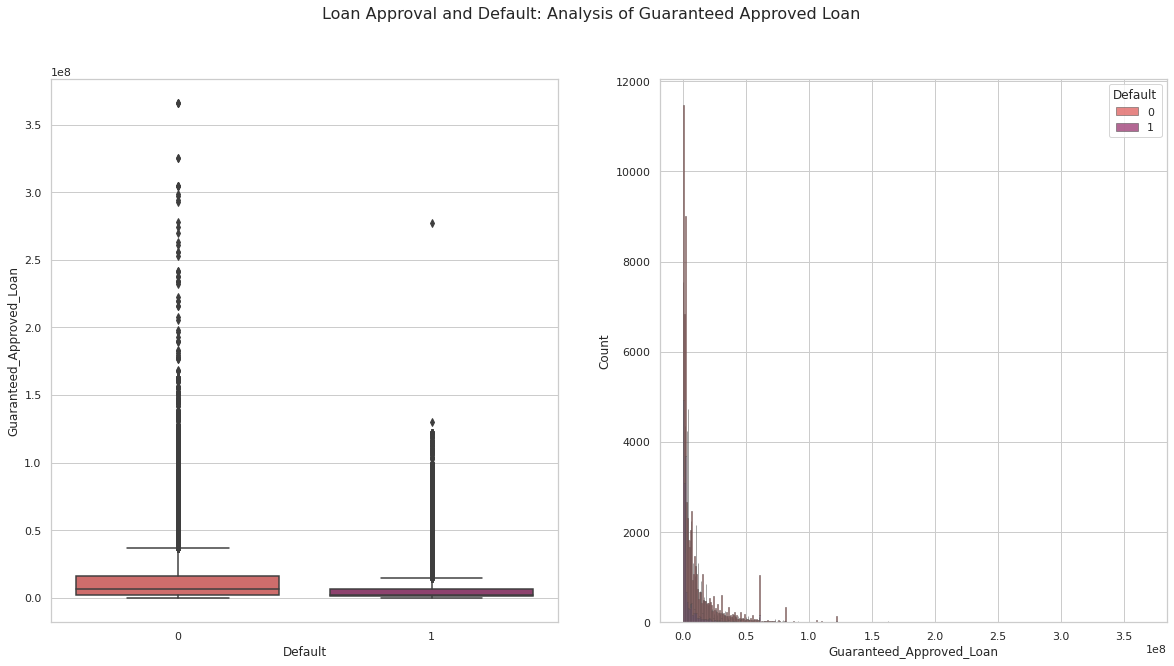

In [76]:
fig, ax = plt.subplots(1, 2, figsize = (20,10))
sns.boxplot(x = 'Default', y = 'Guaranteed_Approved_Loan', palette = "flare", data = train_data, ax = ax[0])
sns.histplot(train_data, x = 'Guaranteed_Approved_Loan', hue = 'Default', multiple = "stack", palette = "flare", edgecolor = ".3", linewidth = .5, ax = ax[1])
fig.suptitle('Loan Approval and Default: Analysis of Guaranteed Approved Loan', fontsize=16)
plt.show()

---
### **Winsorized vs Log transformation 'Guaranteed_Approved_Loan'**
---

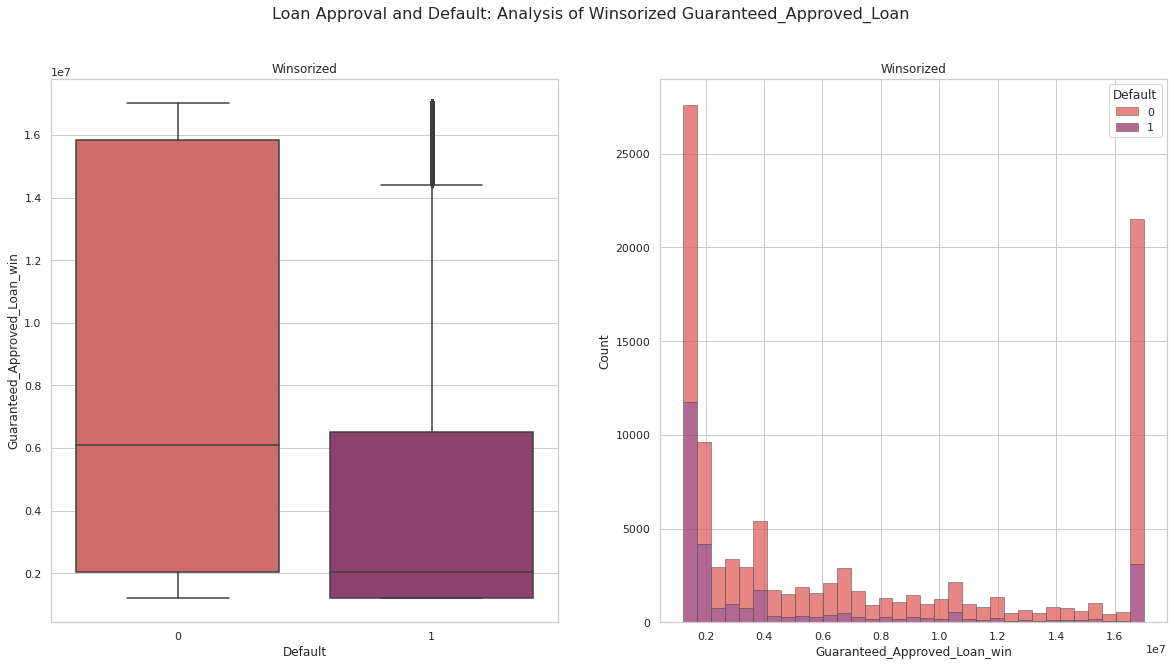

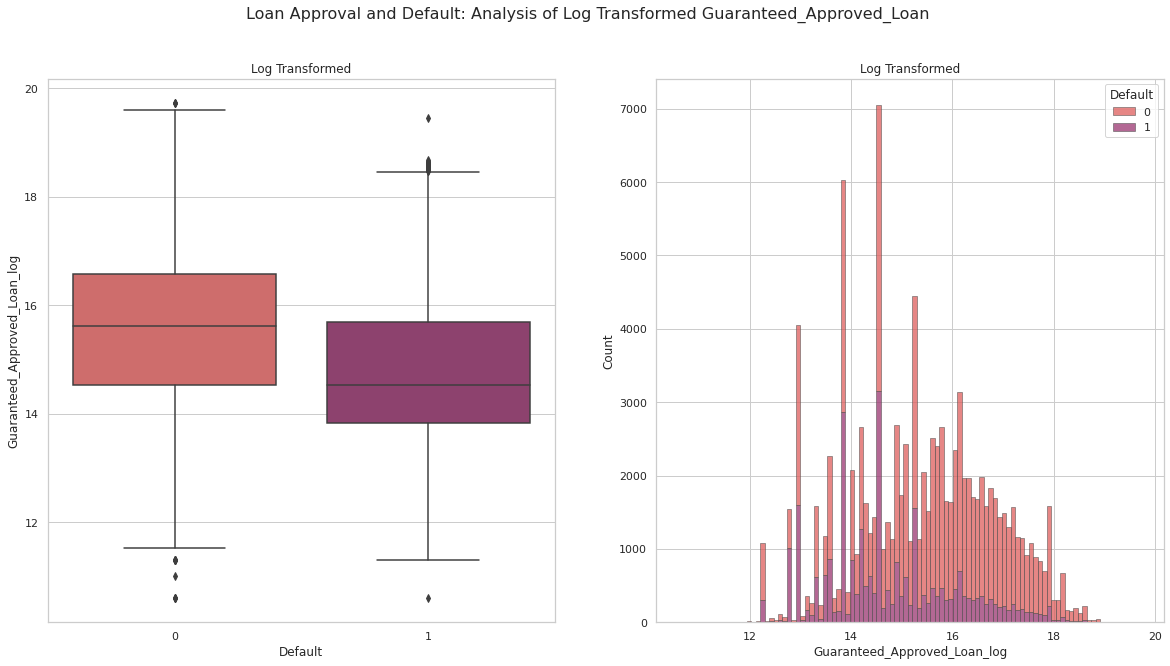

In [77]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
sns.boxplot(x='Default', y='Guaranteed_Approved_Loan_win', palette='flare', data=train_data_win, ax=ax[0])
sns.histplot(train_data_win, x='Guaranteed_Approved_Loan_win', hue='Default', multiple='stack', palette='flare', edgecolor='.3', linewidth=.5, ax=ax[1])
ax[1].set(xlabel='Guaranteed_Approved_Loan_win')
ax[0].set(title='Winsorized', ylabel='Guaranteed_Approved_Loan_win')
ax[1].set(title='Winsorized', ylabel='Count')
fig.suptitle('Loan Approval and Default: Analysis of Winsorized Guaranteed_Approved_Loan', fontsize=16)
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(20, 10))
sns.boxplot(x='Default', y='Guaranteed_Approved_Loan_log', palette='flare', data=train_data_log, ax=ax[0])
sns.histplot(train_data_log, x='Guaranteed_Approved_Loan_log', hue='Default', multiple='stack', palette='flare', edgecolor='.3', linewidth=.5, ax=ax[1])
ax[1].set(xlabel='Guaranteed_Approved_Loan_log')
ax[0].set(title='Log Transformed', ylabel='Guaranteed_Approved_Loan_log')
ax[1].set(title='Log Transformed', ylabel='Count')
fig.suptitle('Loan Approval and Default: Analysis of Log Transformed Guaranteed_Approved_Loan', fontsize=16)
plt.show()

------
## **Gross_Amount_Disbursed**

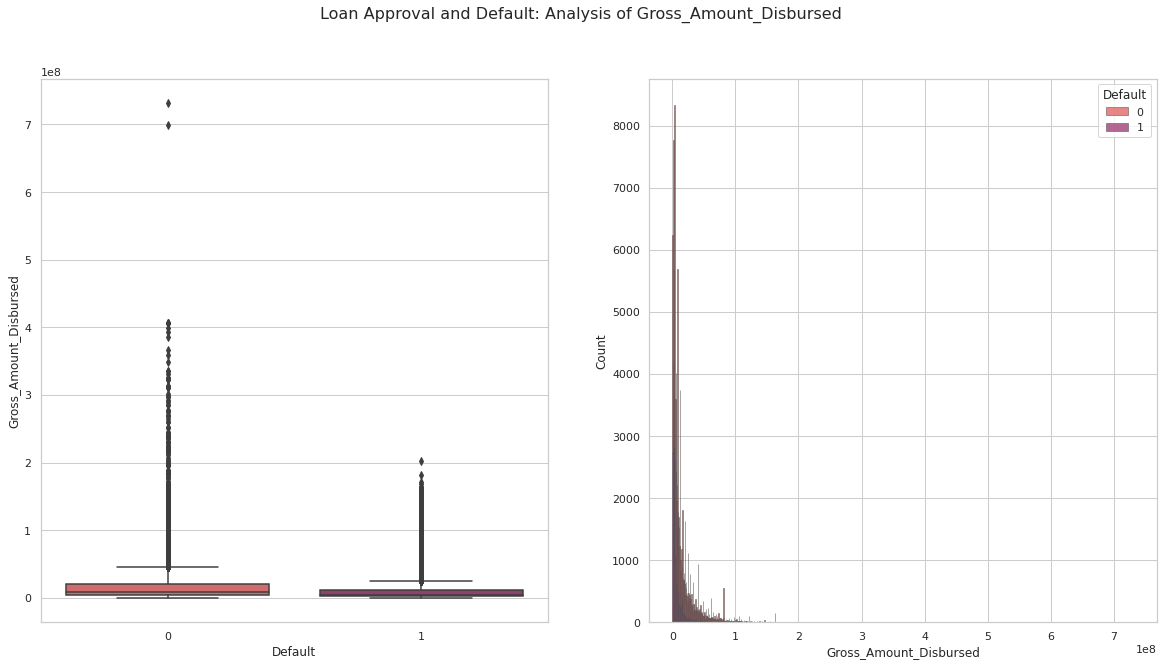

In [78]:
fig, ax = plt.subplots(1, 2, figsize = (20,10))
sns.boxplot(x = 'Default', y = 'Gross_Amount_Disbursed', palette = "flare", data = train_data, ax = ax[0])
sns.histplot(train_data, x = 'Gross_Amount_Disbursed', hue = 'Default', multiple = "stack", palette = "flare", edgecolor = ".3", linewidth = .5, ax = ax[1])
fig.suptitle('Loan Approval and Default: Analysis of Gross_Amount_Disbursed', fontsize=16)
plt.show()

---
### **Winsorized vs Log transformation 'Gross_Amount_Disbursed'**
---

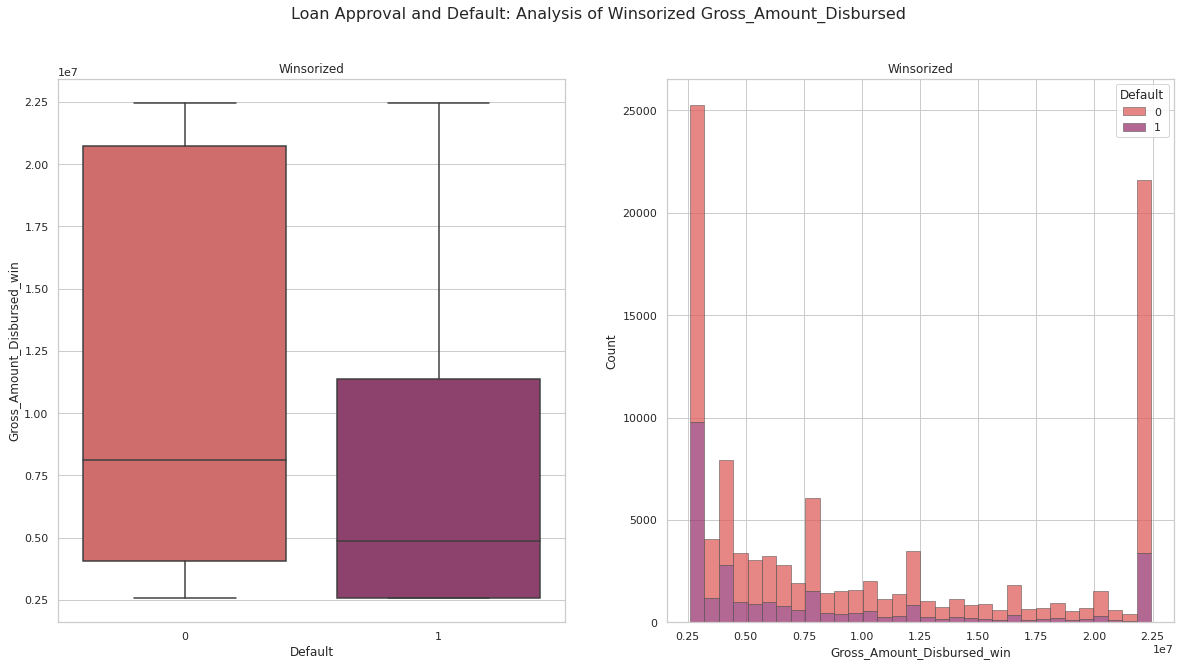

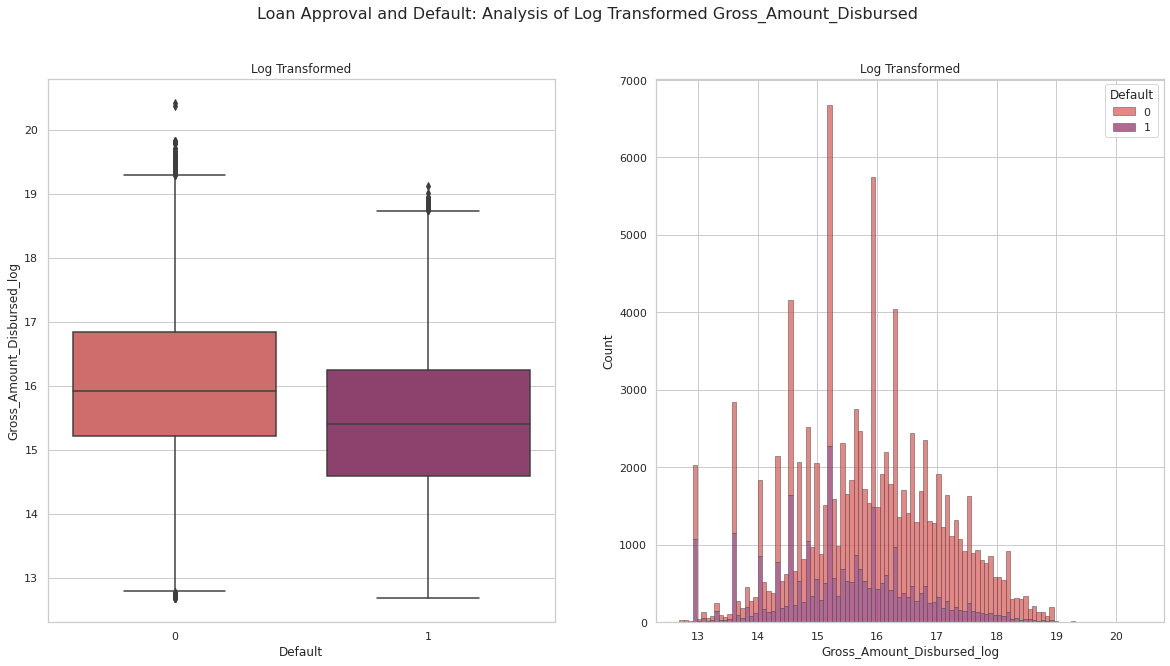

In [79]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
sns.boxplot(x='Default', y='Gross_Amount_Disbursed_win', palette='flare', data=train_data_win, ax=ax[0])
sns.histplot(train_data_win, x='Gross_Amount_Disbursed_win', hue='Default', multiple='stack', palette='flare', edgecolor='.3', linewidth=.5, ax=ax[1])
ax[1].set(xlabel='Gross_Amount_Disbursed_win')
ax[0].set(title='Winsorized', ylabel='Gross_Amount_Disbursed_win')
ax[1].set(title='Winsorized', ylabel='Count')
fig.suptitle('Loan Approval and Default: Analysis of Winsorized Gross_Amount_Disbursed', fontsize=16)
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(20, 10))
sns.boxplot(x='Default', y='Gross_Amount_Disbursed_log', palette='flare', data=train_data_log, ax=ax[0])
sns.histplot(train_data_log, x='Gross_Amount_Disbursed_log', hue='Default', multiple='stack', palette='flare', edgecolor='.3', linewidth=.5, ax=ax[1])
ax[1].set(xlabel='Gross_Amount_Disbursed_log')
ax[0].set(title='Log Transformed', ylabel='Gross_Amount_Disbursed_log')
ax[1].set(title='Log Transformed', ylabel='Count')
fig.suptitle('Loan Approval and Default: Analysis of Log Transformed Gross_Amount_Disbursed', fontsize=16)
plt.show()

---
## **ChargedOff_Amount**
---

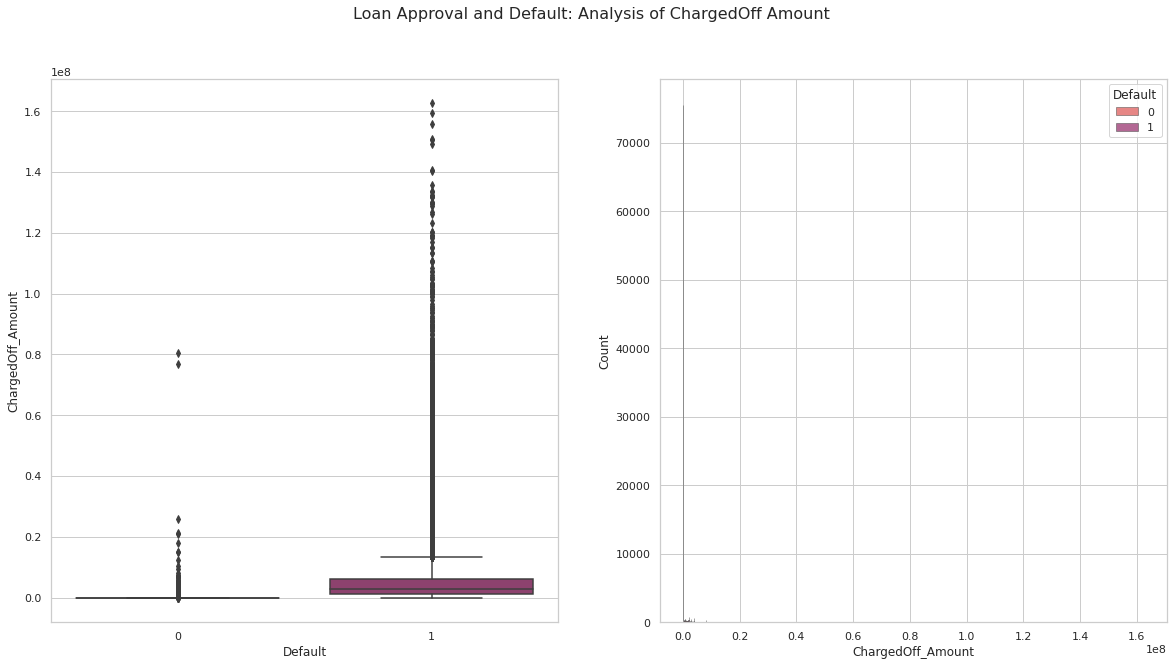

In [80]:
fig, ax = plt.subplots(1, 2, figsize = (20,10))
sns.boxplot(x = 'Default', y = 'ChargedOff_Amount', palette = "flare", data = train_data, ax = ax[0])
sns.histplot(train_data, x = 'ChargedOff_Amount', hue = 'Default', multiple = "stack", palette = "flare", edgecolor = ".3", linewidth = .5, ax = ax[1])
fig.suptitle('Loan Approval and Default: Analysis of ChargedOff Amount', fontsize=16)
plt.show()

---
### **Winsorized vs Log transformation 'ChargedOff_Amount'**
---

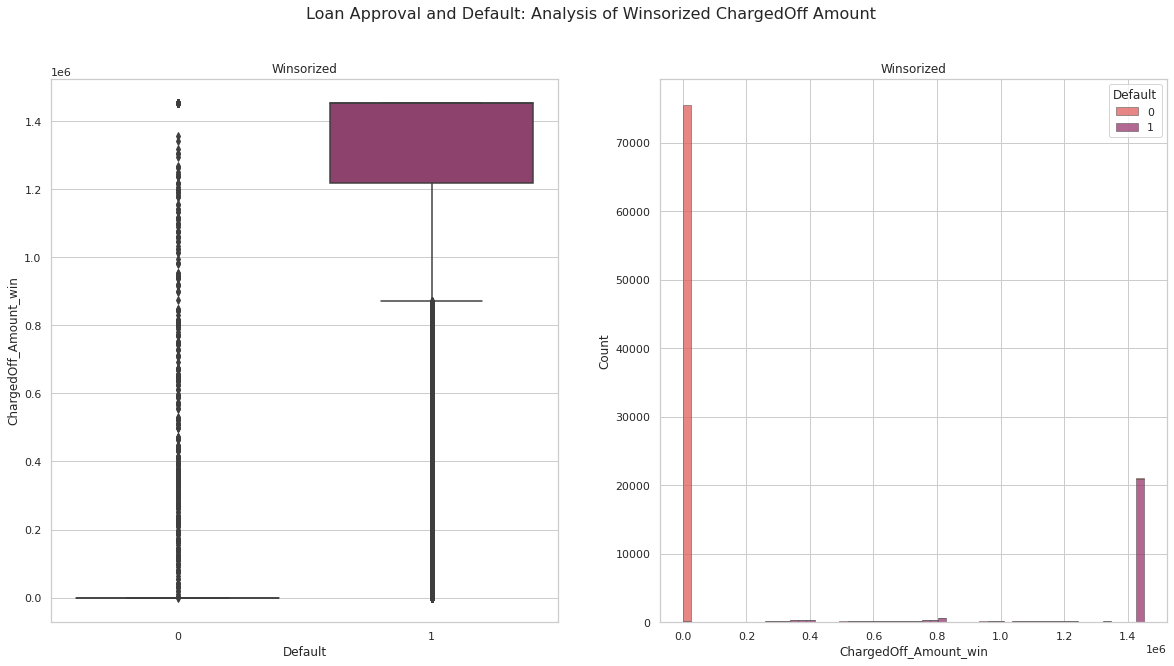

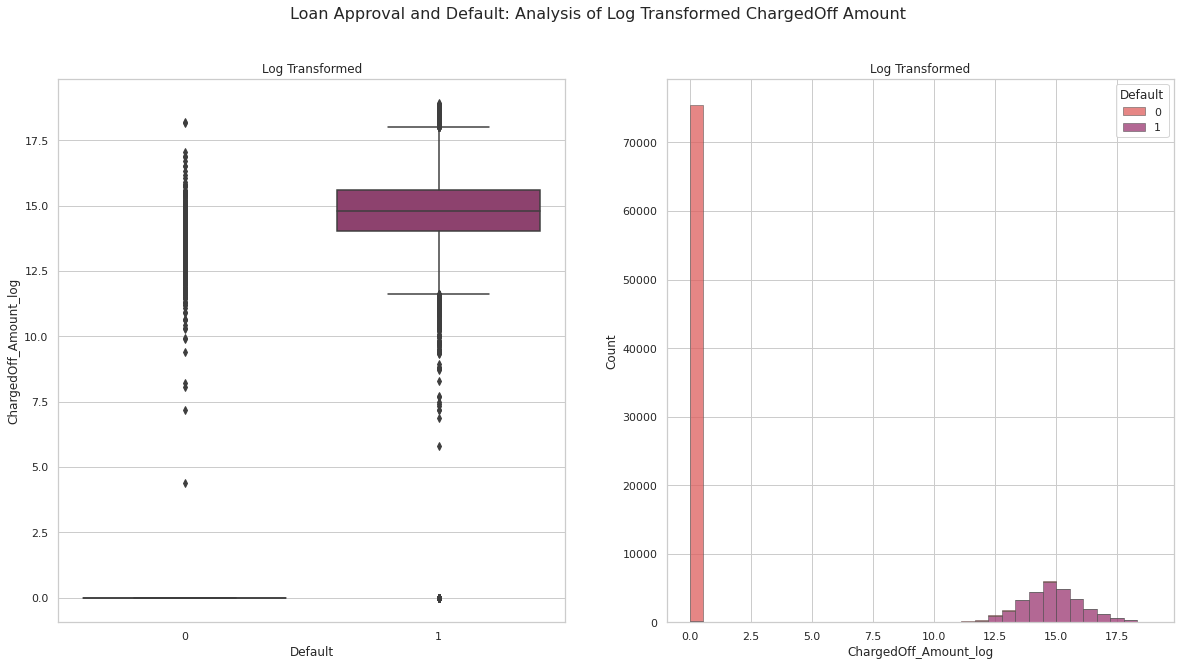

In [81]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
sns.boxplot(x='Default', y='ChargedOff_Amount_win', palette='flare', data=train_data_win, ax=ax[0])
sns.histplot(train_data_win, x='ChargedOff_Amount_win', hue='Default', multiple='stack', palette='flare', edgecolor='.3', linewidth=.5, ax=ax[1])
ax[1].set(xlabel='ChargedOff_Amount_win')
ax[0].set(title='Winsorized', ylabel='ChargedOff_Amount_win')
ax[1].set(title='Winsorized', ylabel='Count')
fig.suptitle('Loan Approval and Default: Analysis of Winsorized ChargedOff Amount', fontsize=16)
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(20, 10))
sns.boxplot(x='Default', y='ChargedOff_Amount_log', palette='flare', data=train_data_log, ax=ax[0])
sns.histplot(train_data_log, x='ChargedOff_Amount_log', hue='Default', multiple='stack', palette='flare', edgecolor='.3', linewidth=.5, ax=ax[1])
ax[1].set(xlabel='ChargedOff_Amount_log')
ax[0].set(title='Log Transformed', ylabel='ChargedOff_Amount_log')
ax[1].set(title='Log Transformed', ylabel='Count')
fig.suptitle('Loan Approval and Default: Analysis of Log Transformed ChargedOff Amount', fontsize=16)
plt.show()

---
## **Overall Observations:**
---
- **Winsorized data:** 
  - The distribution has shifted from right skew to non-normal distribution that reflects the transforms done on the bottom and top 20% of the data.
  - The box plots have shifted their main body to a more central location and encompass a wide range
  - There are fewer 'outliers' but they will remain as relevant data
- **Log transformed data:** 
  - The distribution has shifted from right skew to a more normal distribution.
  - The box plots have shifted their main body to a more central location
  - There are fewer 'outliers' but they will remain as relevant data

----
# **Visualizing test_data**
-----

------
### **Guaranteed_Approved_Loan**
---

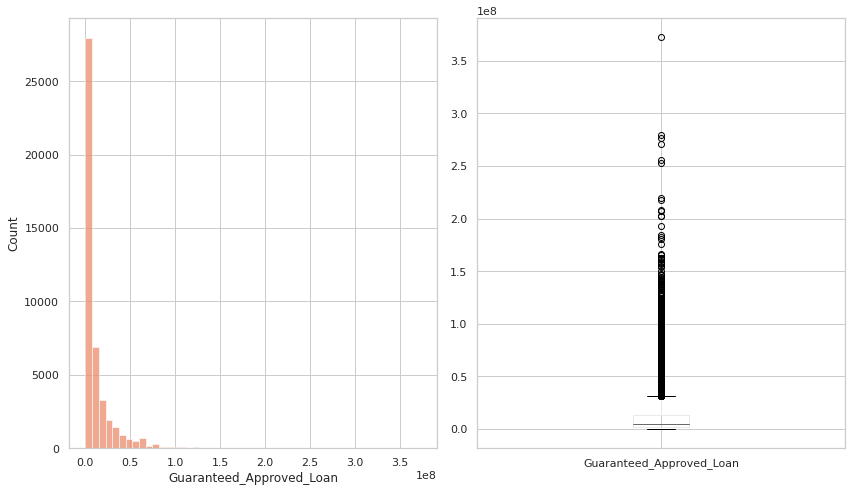

In [82]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 7))

sns.histplot(test_data['Guaranteed_Approved_Loan'], bins=50, ax=ax[0])
test_data.boxplot(column=['Guaranteed_Approved_Loan'], return_type='axes', ax=ax[1])

plt.tight_layout()

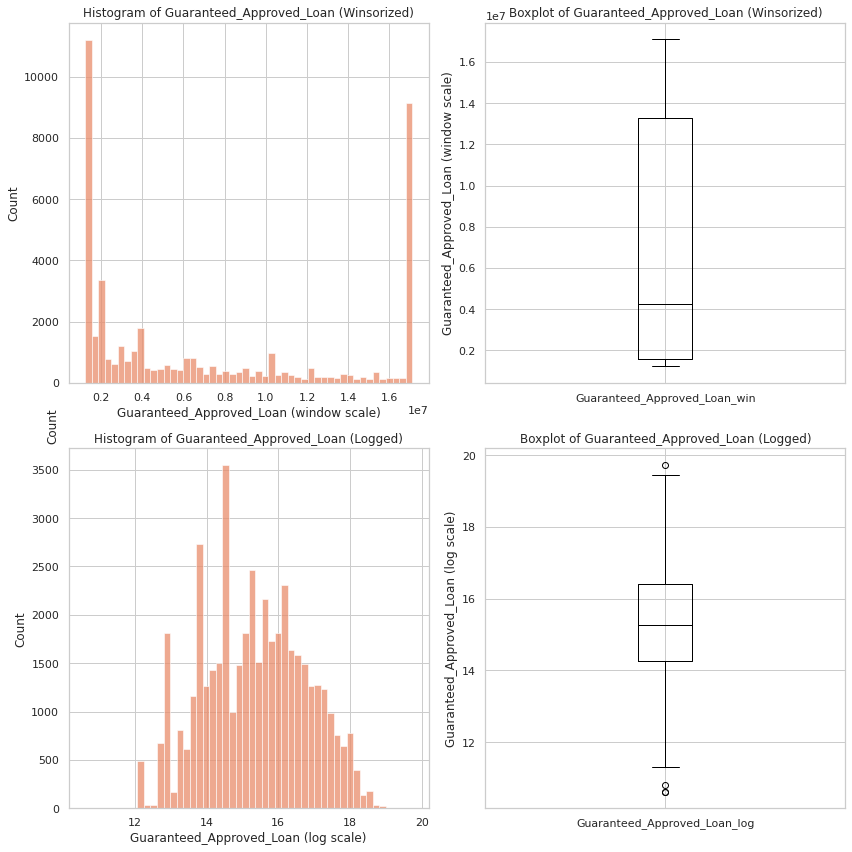

In [83]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

# First row - window scale
sns.histplot(test_data_win['Guaranteed_Approved_Loan_win'], bins=50, ax=ax[0, 0])
ax[0, 0].set(xlabel='Guaranteed_Approved_Loan (window scale)', ylabel='Count', title='Histogram of Guaranteed_Approved_Loan (Winsorized)')
box = test_data_win.boxplot(column=['Guaranteed_Approved_Loan_win'], ax=ax[0, 1], return_type='dict')
ax[0, 1].set(ylabel='Guaranteed_Approved_Loan (window scale)', title='Boxplot of Guaranteed_Approved_Loan (Winsorized)')
for key in box.keys():
    for element in box[key]:
        element.set(color='black')

# Second row - log scale
sns.histplot(test_data_log['Guaranteed_Approved_Loan_log'], bins=50, ax=ax[1, 0])
ax[1, 0].set(xlabel='Guaranteed_Approved_Loan (log scale)', ylabel='Count', title='Histogram of Guaranteed_Approved_Loan (Logged)')
box = test_data_log.boxplot(column=['Guaranteed_Approved_Loan_log'], ax=ax[1, 1], return_type='dict')
ax[1, 1].set(ylabel='Guaranteed_Approved_Loan (log scale)', title='Boxplot of Guaranteed_Approved_Loan (Logged)')
for key in box.keys():
    for element in box[key]:
        element.set(color='black')

# Add a common ylabel for the left-hand side plots
fig.text(0.06, 0.5, 'Count', va='center', rotation='vertical')

plt.tight_layout()

------
### **Gross_Amount_Disbursed**
---

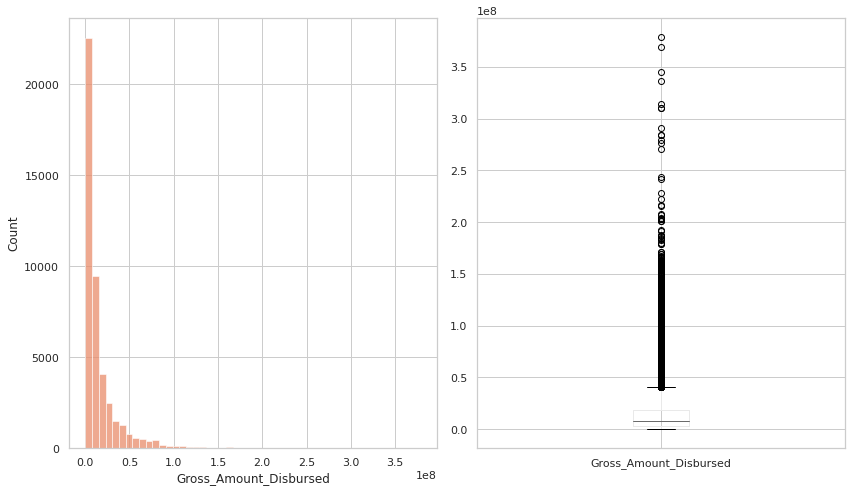

In [84]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 7))

sns.histplot(test_data['Gross_Amount_Disbursed'], bins=50, ax=ax[0])
test_data.boxplot(column=['Gross_Amount_Disbursed'], return_type='axes', ax=ax[1])

plt.tight_layout()

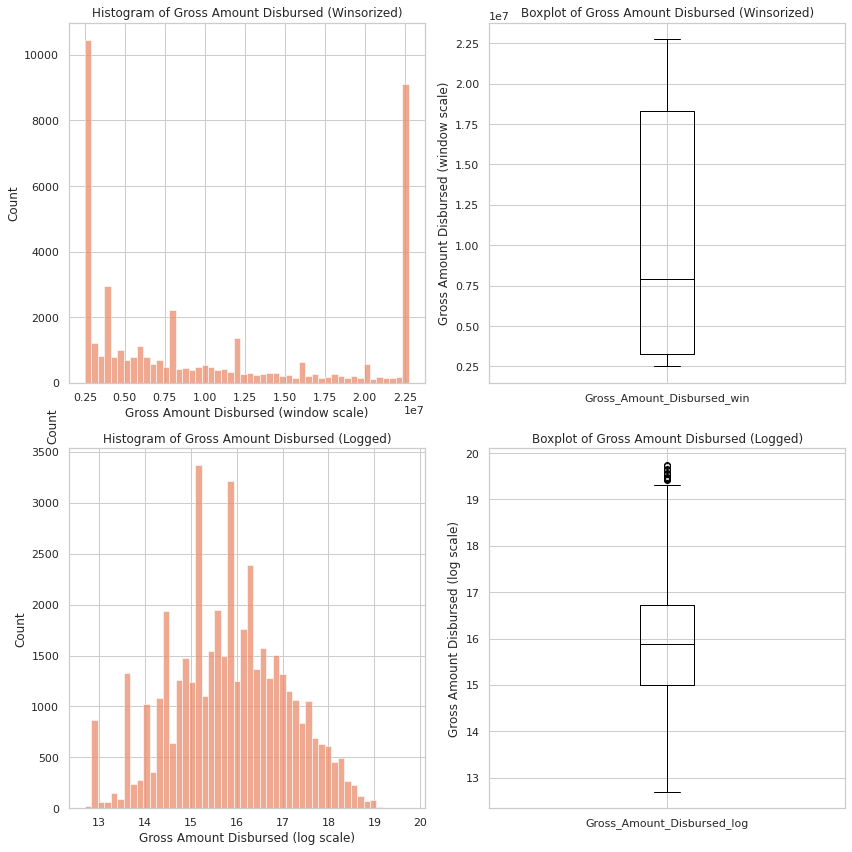

In [85]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

# First row - window scale
sns.histplot(test_data_win['Gross_Amount_Disbursed_win'], bins=50, ax=ax[0, 0])
ax[0, 0].set(xlabel='Gross Amount Disbursed (window scale)', ylabel='Count', title='Histogram of Gross Amount Disbursed (Winsorized)')
box = test_data_win.boxplot(column=['Gross_Amount_Disbursed_win'], ax=ax[0, 1], return_type='dict')
ax[0, 1].set(ylabel='Gross Amount Disbursed (window scale)', title='Boxplot of Gross Amount Disbursed (Winsorized)')
for key in box.keys():
    for element in box[key]:
        element.set(color='black')

# Second row - log scale
sns.histplot(test_data_log['Gross_Amount_Disbursed_log'], bins=50, ax=ax[1, 0])
ax[1, 0].set(xlabel='Gross Amount Disbursed (log scale)', ylabel='Count', title='Histogram of Gross Amount Disbursed (Logged)')
box = test_data_log.boxplot(column=['Gross_Amount_Disbursed_log'], ax=ax[1, 1], return_type='dict')
ax[1, 1].set(ylabel='Gross Amount Disbursed (log scale)', title='Boxplot of Gross Amount Disbursed (Logged)')
for key in box.keys():
    for element in box[key]:
        element.set(color='black')

# Add a common ylabel for the left-hand side plots
fig.text(0.06, 0.5, 'Count', va='center', rotation='vertical')

plt.tight_layout()

------
### **ChargedOff_Amount**
---

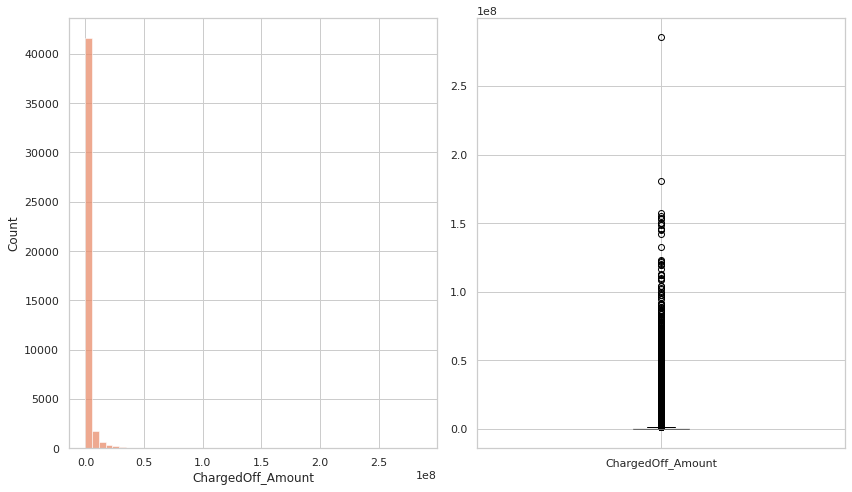

In [86]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 7))

sns.histplot(test_data['ChargedOff_Amount'], bins=50, ax=ax[0])
test_data.boxplot(column=['ChargedOff_Amount'], return_type='axes', ax=ax[1])

plt.tight_layout()

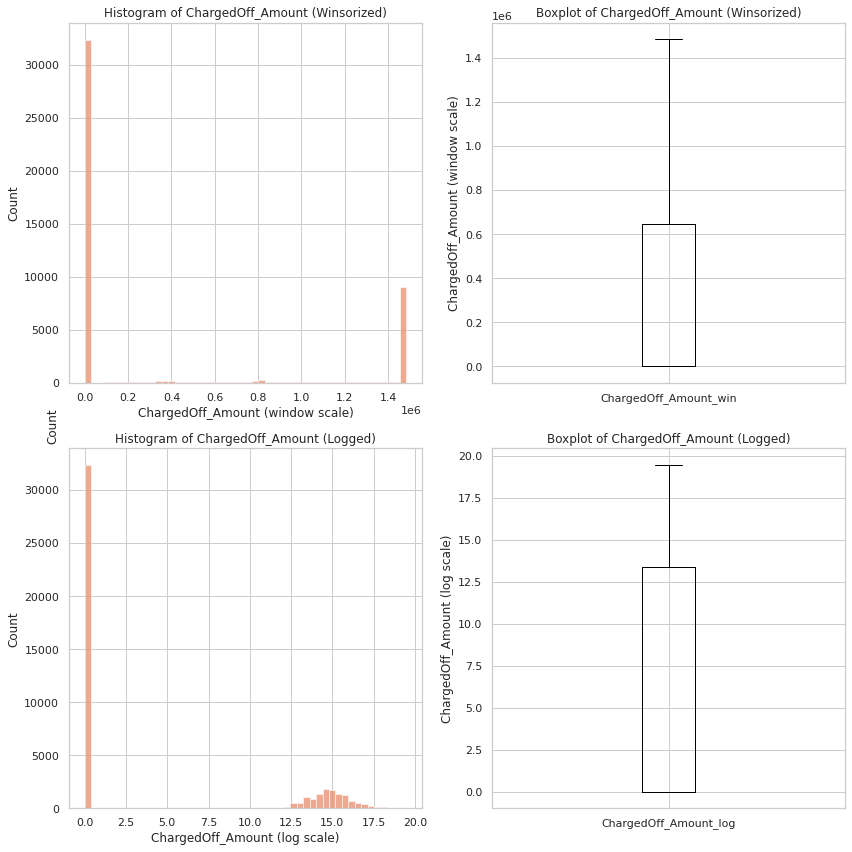

In [87]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

# First row - window scale
sns.histplot(test_data_win['ChargedOff_Amount_win'], bins=50, ax=ax[0, 0])
ax[0, 0].set(xlabel='ChargedOff_Amount (window scale)', ylabel='Count', title='Histogram of ChargedOff_Amount (Winsorized)')
box = test_data_win.boxplot(column=['ChargedOff_Amount_win'], ax=ax[0, 1], return_type='dict')
ax[0, 1].set(ylabel='ChargedOff_Amount (window scale)', title='Boxplot of ChargedOff_Amount (Winsorized)')
for key in box.keys():
    for element in box[key]:
        element.set(color='black')

# Second row - log scale
sns.histplot(test_data_log['ChargedOff_Amount_log'], bins=50, ax=ax[1, 0])
ax[1, 0].set(xlabel='ChargedOff_Amount (log scale)', ylabel='Count', title='Histogram of ChargedOff_Amount (Logged)')
box = test_data_log.boxplot(column=['ChargedOff_Amount_log'], ax=ax[1, 1], return_type='dict')
ax[1, 1].set(ylabel='ChargedOff_Amount (log scale)', title='Boxplot of ChargedOff_Amount (Logged)')
for key in box.keys():
    for element in box[key]:
        element.set(color='black')

# Add a common ylabel for the left-hand side plots
fig.text(0.06, 0.5, 'Count', va='center', rotation='vertical')

plt.tight_layout()

---
# **Saving data to parquet files**
---

---
## **Save train_data_log and test_data_log - log transformed**
---

In [88]:
train_data_log.to_parquet('https://github.com/MPBDS2022/Data-Science/tree/main/clean/outputs/parquet/train_data_log.parquet')

test_data_log.to_parquet('https://github.com/MPBDS2022/Data-Science/tree/main/clean/outputs/parquet/test_data_log.parquet')

---
## **Save train_data_win and test_data_win - winsorized**
---

In [89]:
train_data_win.to_parquet('https://github.com/MPBDS2022/Data-Science/tree/main/clean/outputs/parquet/train_data_win.parquet')

test_data_win.to_parquet('https://github.com/MPBDS2022/Data-Science/tree/main/clean/outputs/parquet/test_data_win.parquet')

---
## **Save train_data_all and test_data_all - NO TRANSFORMATIONS**
---

In [90]:
train_data_all = train_data.copy()
test_data_all = test_data.copy()

In [91]:
train_data_all.to_parquet('https://github.com/MPBDS2022/Data-Science/tree/main/clean/outputs/parquet/train_data_all.parquet')

test_data_all.to_parquet('https://github.com/MPBDS2022/Data-Science/tree/main/clean/outputs/parquet/test_data_all.parquet')